# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [2]:
pd.get_dummies(penguins)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [3]:
model_data = pd.get_dummies(penguins, columns = ["species", "island", "sex"], drop_first = True)

# Model 4: Predictor Variables - bill_length_mm, body_mass_g, flipper_length_mm, sex_male, 'island_Dream', 'island_Torgersen'
y = model_data['bill_depth_mm'] # response variables
X = model_data[['bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'sex_male', 'island_Dream', 'island_Torgersen']] # explanatory variables 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # Split into testing and validation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train) # fit linear model
lr_fit.coef_ # find coefficients
test_pred_lr = lr_fit.predict(X_test)
train_pred_lr = lr_fit.predict(X_train)

# Calculate MSE
test4MSE = mean_squared_error(y_test, test_pred_lr)
train4MSE = mean_squared_error(y_train, train_pred_lr)


In [4]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)
test_pred_knn3 = knn.predict(X_test)
train_pred_knn3 = knn.predict(X_train)

# Calculate MSE
trainknn3MSE = mean_squared_error(y_test, test_pred_knn3)
testknn3MSE = mean_squared_error(y_train, train_pred_knn3)

In [5]:
knn = KNeighborsRegressor(n_neighbors=8)

knn.fit(X_train, y_train)
test_pred_knn8 = knn.predict(X_test)
train_pred_knn8 = knn.predict(X_train)

# Calculate MSE
trainknn8MSE = mean_squared_error(y_test, test_pred_knn8)
testknn8MSE = mean_squared_error(y_train, train_pred_knn8)

In [6]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor(max_depth = 1)
decisiontree.fit(X_train, y_train)
test_pred_dt = decisiontree.predict(X_test)
train_pred_dt = decisiontree.predict(X_train)

# Calculate MSE
traindtMSE = mean_squared_error(y_test, test_pred_dt)
testdtMSE = mean_squared_error(y_train, train_pred_dt)

In [10]:
data = [['Linear Regression', train4MSE, test4MSE],
        ['KNN (3)',trainknn3MSE, testknn3MSE],
        ['KNN (8)', trainknn8MSE, testknn8MSE],
        ['Decision Tree (1)', traindtMSE, testdtMSE]]

# Create a DataFrame from the list of lists
df = pd.DataFrame(data, columns=['Model', 'Train MSE', 'Test MSE'])
df

,Model,Train MSE,Test MSE
0,Linear Regression,1.005146,1.699238
1,KNN (3),3.691852,0.869116
2,KNN (8),3.723625,1.331516
3,Decision Tree (1),2.189377,1.455647


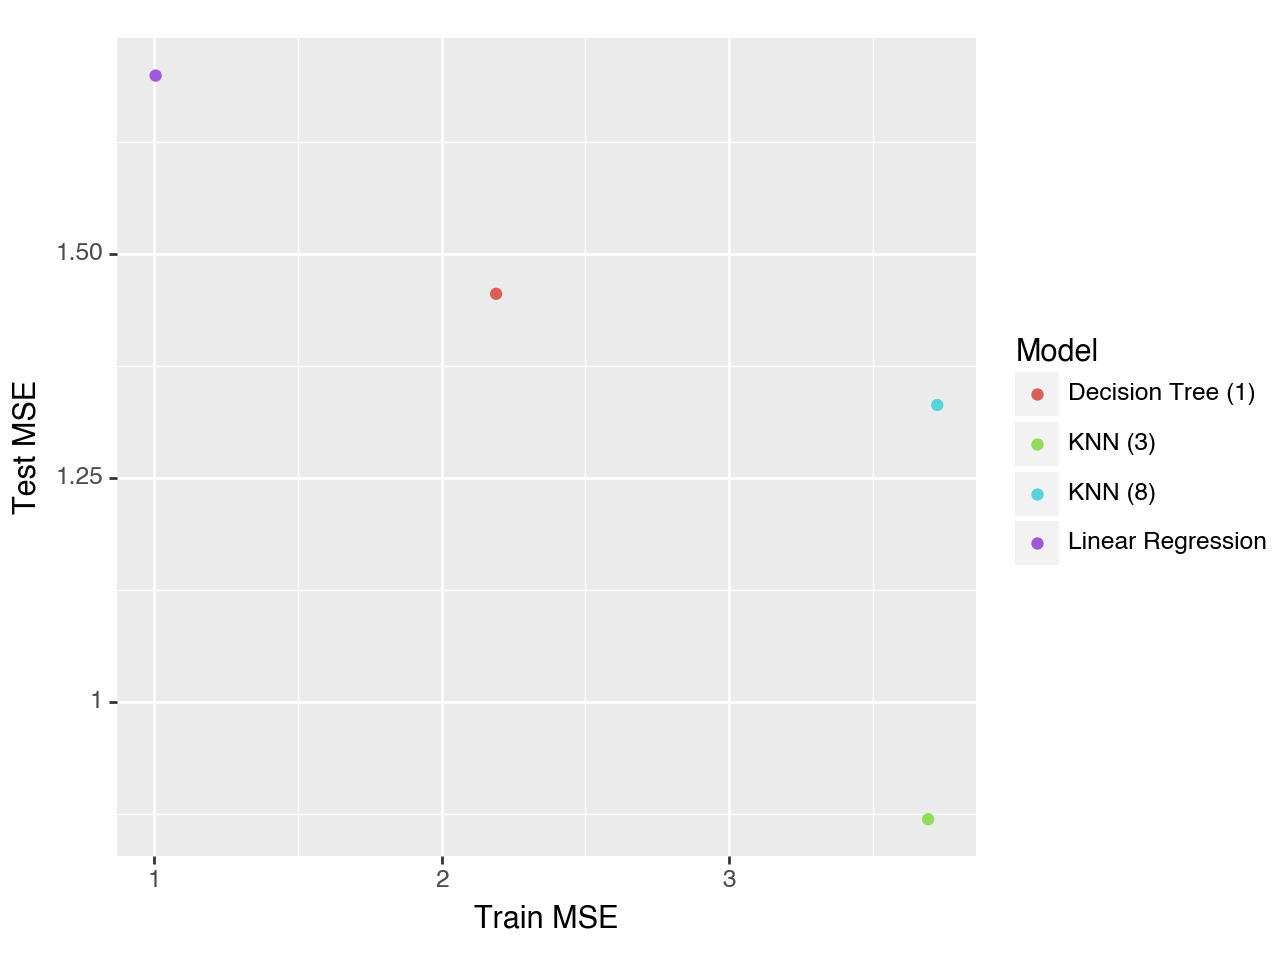

<Figure Size: (640 x 480)>

In [11]:
from plotnine import *
(ggplot(df, aes(x='Train MSE', y='Test MSE', color='Model'))
               + geom_point()
)